In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matricesAleatorias import matham as mh

In [3]:
#Para la matriz
nmat = 10000
Hmat = mh.MatrizHamiltoniana(nmat) #Se crea el objeto Hamiltoniana
densidadmat = mh.DensidadesHam(nmat,1) #Se crea el objeto de las densidades

In [4]:
HGOEmat = Hmat.GOE() #Se construye la matriz hamiltoniana GOE de n*n

In [ ]:
Evalsmat = np.linalg.eigvalsh(HGOEmat) #Se calculan los egenvalores ordenados
EvalsNormmat = Evalsmat / np.sqrt(nmat)

In [13]:
#Se extrae un porcentaje de los eigenvalores
m = int(nmat/6)
EvalsLinmat = Evalsmat[m:-m]
EvalsLinNormmat = EvalsNormmat[m:-m]

In [15]:
Dommat = np.linspace(m,EvalsLinmat.size+m,EvalsLinmat.size)
DomNormmat = np.linspace(m,EvalsLinNormmat.size+m,EvalsLinNormmat.size)

In [17]:
#Se calculan los espaciamientos no normalizados
Espaciamientosmat = np.diff(EvalsLinmat)
deltamat = Espaciamientosmat.mean()
Smat = Espaciamientosmat / deltamat

In [19]:
r = (Evalsmat[1:-1] - Evalsmat[2:]) / (Evalsmat[:-2] - Evalsmat[1:-1])

In [23]:
Porcentaje = 100 - 200*m/nmat
Porcentaje

66.68

# Ensambles

In [26]:
#Datos ensamble
nens = 100
nsamp = 100000
Hens = mh.MatrizHamiltoniana(nens)
Evalens = []
densidadens = mh.DensidadesHam(nsamp,1)

In [28]:
for i in range(nsamp):
    HGOEens = Hens.GOE()
    eval = np.linalg.eigvalsh(HGOEens)
    eval = eval / np.sqrt(nens)
    Evalens.append(eval)

In [30]:
Evalens = np.concatenate(Evalens)

In [32]:
rens = []

In [34]:
for i in range(int(nsamp/nens)):
    EvalSamp = Evalens[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [36]:
rens = np.concatenate(rens)

In [38]:
mens = int(nens/6)
Porcentajeens = 100 - 200*mens/nens
Porcentajeens

68.0

In [40]:
Sens = []

In [42]:
for i in range(int(nsamp/nens)):
    EvalSamp = Evalens[0+i*100:100 + i*100]
    EvalSampLin = EvalSamp[mens:-mens]
    EspaSamp = np.diff(EvalSampLin)
    deltaSamp = EspaSamp.mean()
    Ssamp = EspaSamp / deltaSamp
    Sens.append(Ssamp)

In [44]:
Sens = np.concatenate(Sens)

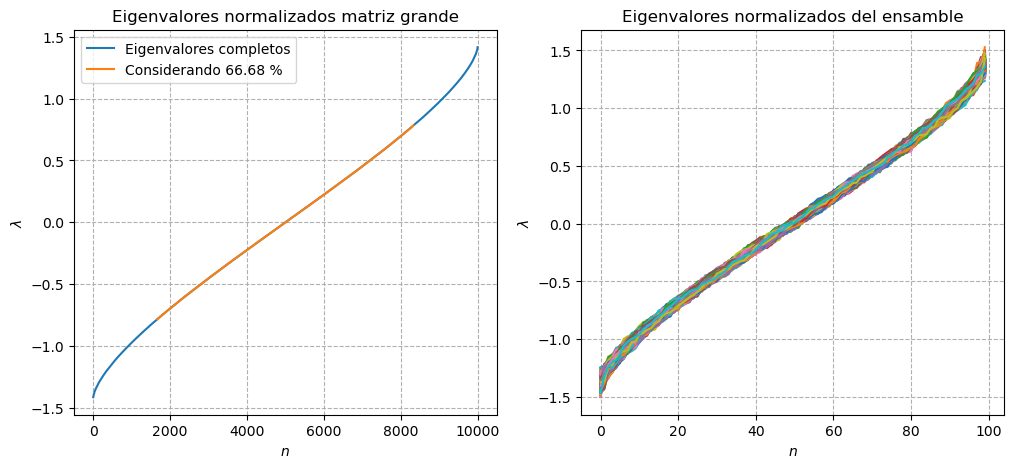

In [125]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(EvalsNormmat,label='Eigenvalores completos')
ax[0].plot(DomNormmat,EvalsLinNormmat,label=f'Considerando {Porcentaje} %')
ax[0].set_title('Eigenvalores normalizados matriz grande')
ax[0].grid(True,linestyle='--')
ax[0].legend()
ax[0].set_xlabel(r'$ n $')
ax[0].set_ylabel(r'$ \lambda $')

for i in range(int(nsamp/nens)):
    ax[1].plot(Evalens[0+i*100:100 + i*100])
ax[1].set_title('Eigenvalores normalizados del ensamble')
ax[1].grid(True,linestyle='--')
ax[1].set_xlabel(r'$ n $')
ax[1].set_ylabel(r'$ \lambda $')

plt.savefig('EigenvaloresGOE.png',dpi=300)

# Ley de semi-Circulo

In [61]:
xnormmat = np.linspace(EvalsNormmat.min(),EvalsNormmat.max(),nmat)
plamNormmat = densidadmat.SemiCicle(xnormmat)

In [73]:
xlamens = np.linspace(-1.5,1.5,1000)
plamens = densidadens.SemiCicle(xlamens)

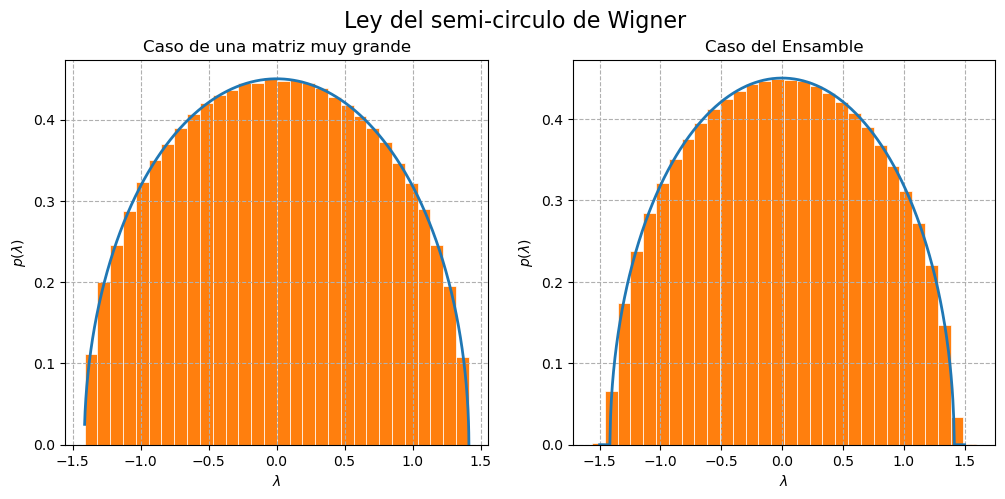

In [127]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle('Ley del semi-circulo de Wigner',fontsize=16)

ax[0].plot(xnormmat,plamNormmat,lw=2)
ax[0].hist(EvalsNormmat,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ \lambda $')
ax[0].set_ylabel(r'$ p(\lambda) $')

ax[1].plot(xlamens,plamens,lw=2)
ax[1].hist(Evalens,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ \lambda $')
ax[1].set_ylabel(r'$ p(\lambda) $')

plt.savefig('Semi-CirculoGOE.png',dpi=300)

# Espaciamientos

In [92]:
sfunmat = np.linspace(0,5,100)
psmat = densidadmat.Ps(sfunmat)

In [94]:
xsens = np.linspace(0,5,1000)
psens = densidadens.Ps(xsens)

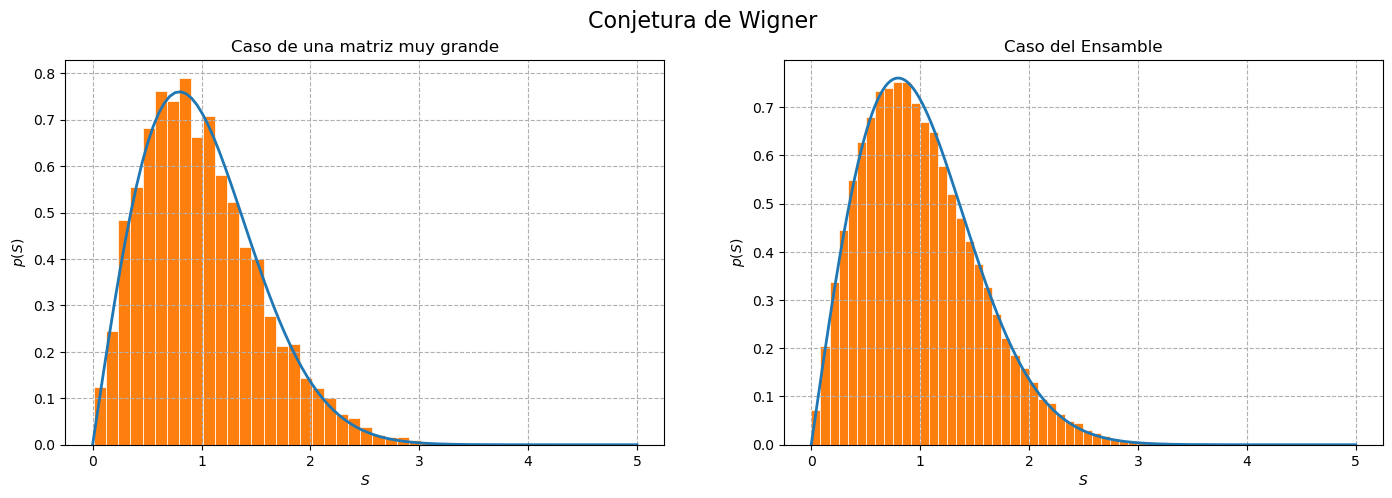

In [129]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle('Conjetura de Wigner',fontsize=16)

ax[0].plot(sfunmat,psmat,lw=2)
ax[0].hist(Smat,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ S $')
ax[0].set_ylabel(r'$ p(S) $')

ax[1].plot(xsens,psens,lw=2)
ax[1].hist(Sens,bins=50,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ S $')
ax[1].set_ylabel(r'$ p(S) $')

plt.savefig('ConjeturaWignerGOE.png',dpi=300)

# Razon de espaciamientos

In [113]:
xrmat = np.linspace(0,10,1000)
prmat = densidadmat.Pr(xrmat)

In [115]:
xrens = np.linspace(0,10,1000)
prens = densidadens.Pr(xrens)

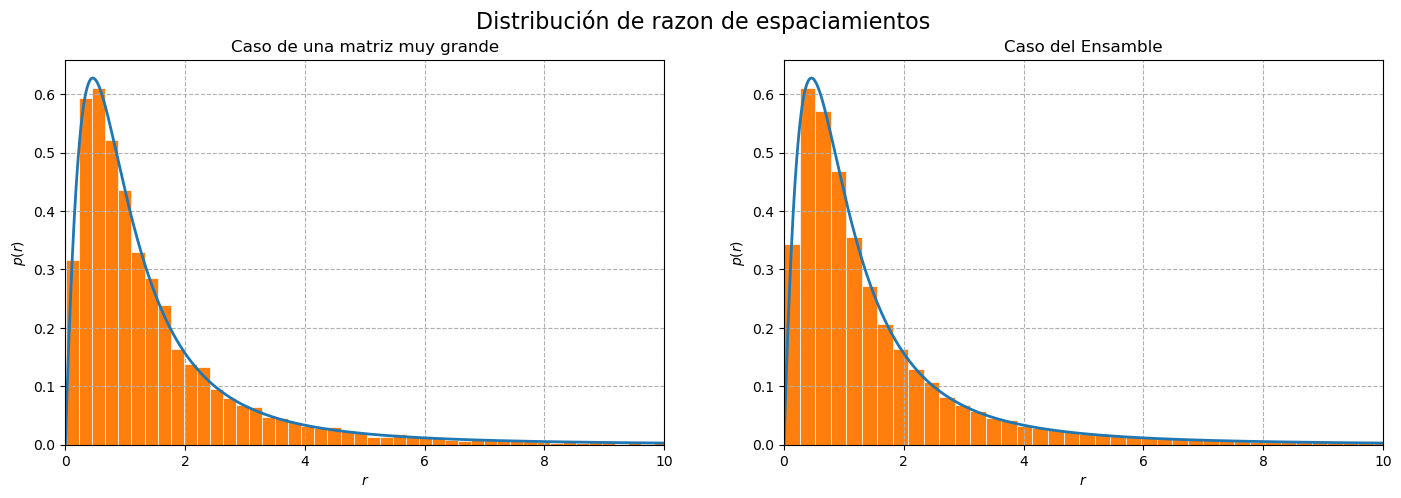

In [131]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle('Distribución de razon de espaciamientos',fontsize=16)

ax[0].plot(xrmat,prmat,lw=2)
ax[0].hist(r,bins=500,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ r $')
ax[0].set_ylabel(r'$ p(r) $')
ax[0].set_xlim(0,10)

ax[1].plot(xrens,prens,lw=2)
ax[1].hist(rens,bins=3000,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ r $')
ax[1].set_ylabel(r'$ p(r) $')
ax[1].set_xlim(0,10)

plt.savefig('prGOE.png',dpi=300)